# Amils et al. 2023

In [1]:
# Add higher directory to python modules path

import sys

sys.path.append("..")

In [2]:
import os
import yaml

import plotly.express as px

import pandas as pd

from biofoundry.data.amils2023 import (
    Amils2023DataLoader,
    plot_concentrations,
    plot_microbial_data
)
from biofoundry.utils import save_fig

In [3]:
# Load config

with open("../biofoundry/config.yml") as config_file:
    config = yaml.safe_load(config_file)

In [4]:
data_loader = Amils2023DataLoader()

### Elements data

Dataset S2 - ICP-MS elemental analysis of core samples (ppm)

In [5]:
elements_df_long = data_loader.get_elements()
elements_df_long

,Depth,Species,Concentration (ppm)
0,121.8,Li,131.23
1,130.8,Li,1244.97
2,138.0,Li,0.66
3,139.4,Li,89.95
4,190.0,Li,0.14
...,...,...,...
667,519.1,Pb,20.19
668,544.0,Pb,71.89
669,568.6,Pb,19.71
670,596.0,Pb,0.00


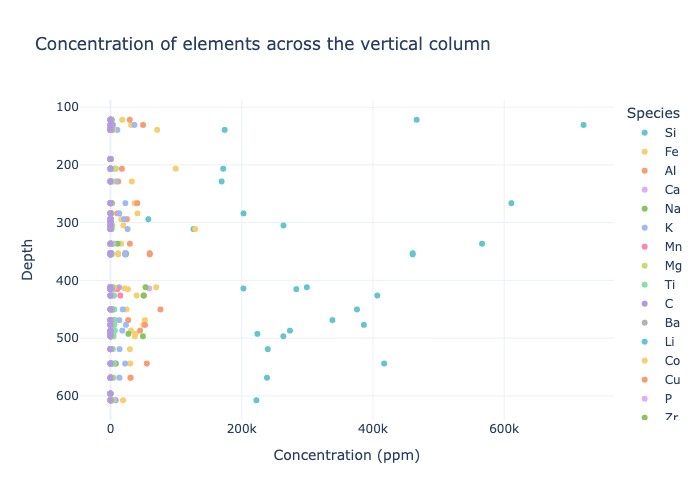

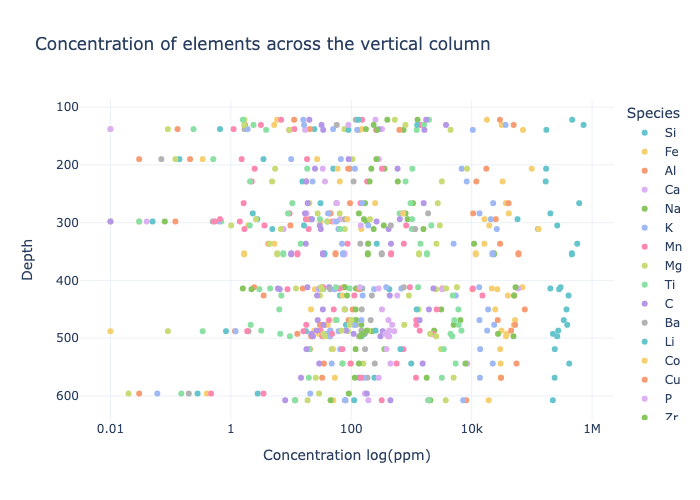

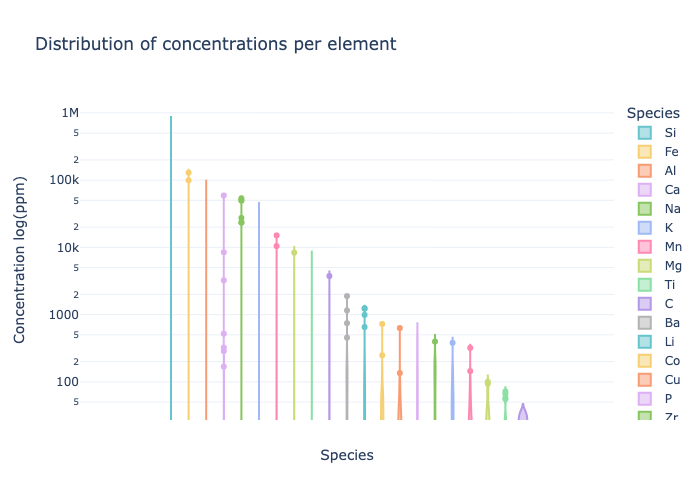

In [6]:
plot_concentrations(
    data_df_long=elements_df_long,
    data_type="element",
    config=config
)

### Anions and organic compounds data

Dataset S3 - Ionic chromatography of BH10 soluble organic and inorganic anions (ppm)

In [7]:
anions_df_long = data_loader.get_anions()
anions_df_long

,Depth,Species,Concentration (ppm)
0,90.10,pH,7.500000
1,94.90,pH,7.500000
2,100.00,pH,8.000000
3,102.60,pH,7.500000
4,103.32,pH,7.000000
...,...,...,...
1685,600.00,Oxalate,0.254286
1686,605.38,Oxalate,0.625714
1687,607.60,Oxalate,0.091429
1688,609.90,Oxalate,0.160000


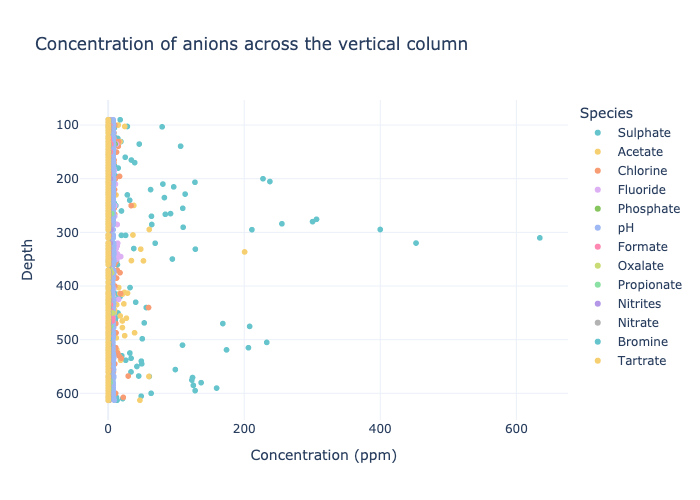

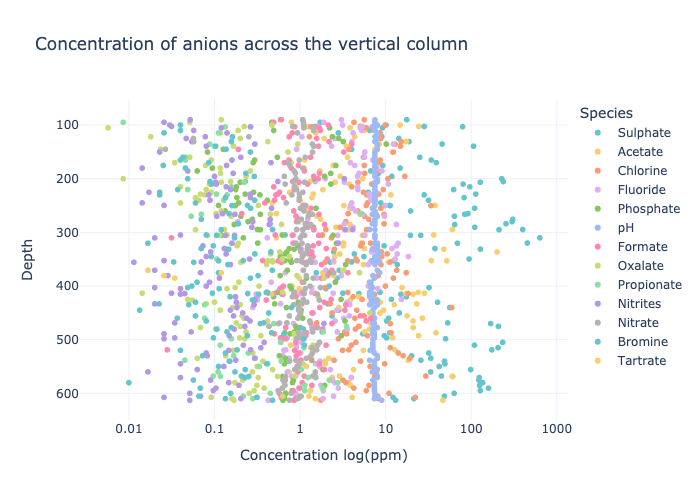

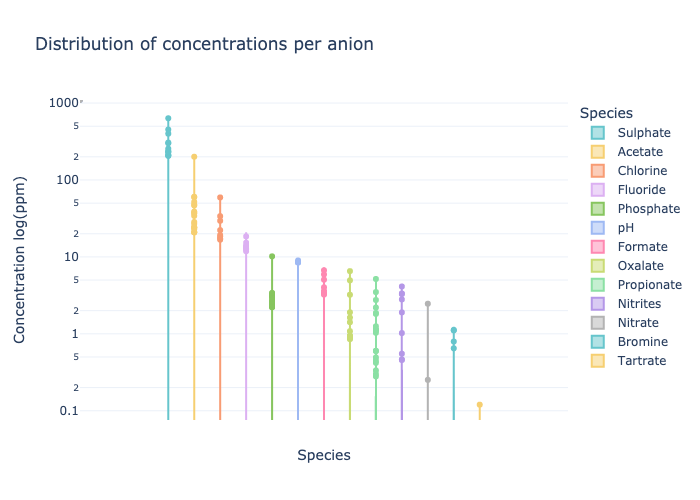

In [8]:
plot_concentrations(
    data_df_long=anions_df_long,
    data_type="anion",
    config=config
)

### Cations data

Table S1 - Soluble cations (ppm)

In [9]:
cations_df_long = data_loader.get_cations()
cations_df_long

,Depth,Species,Concentration (ppm)
0,121.8,Fe2+,0.60
1,130.8,Fe2+,0.20
2,139.4,Fe2+,0.60
3,206.6,Fe2+,1.17
4,228.7,Fe2+,16.80
...,...,...,...
103,538.4,NH4+,13.20
104,544.0,NH4+,21.10
105,588.6,NH4+,27.00
106,607.6,NH4+,21.20


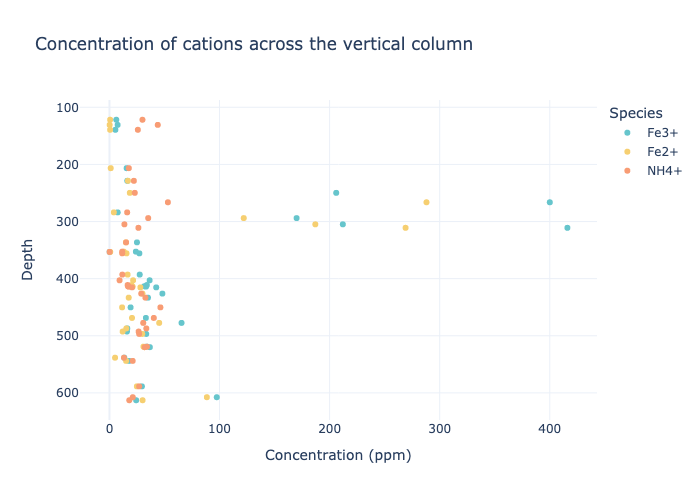

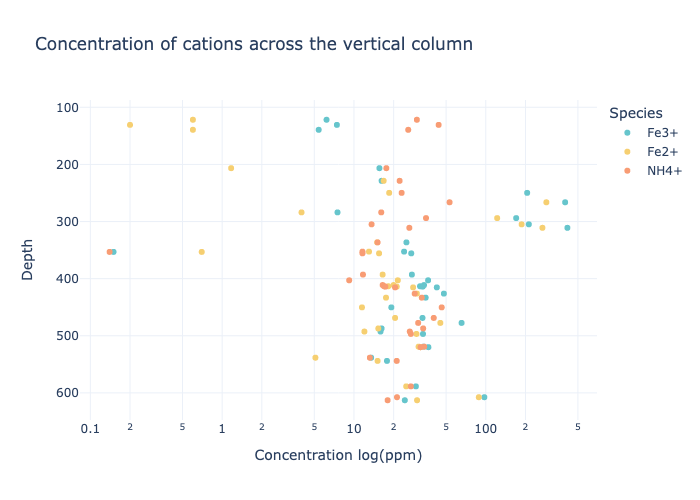

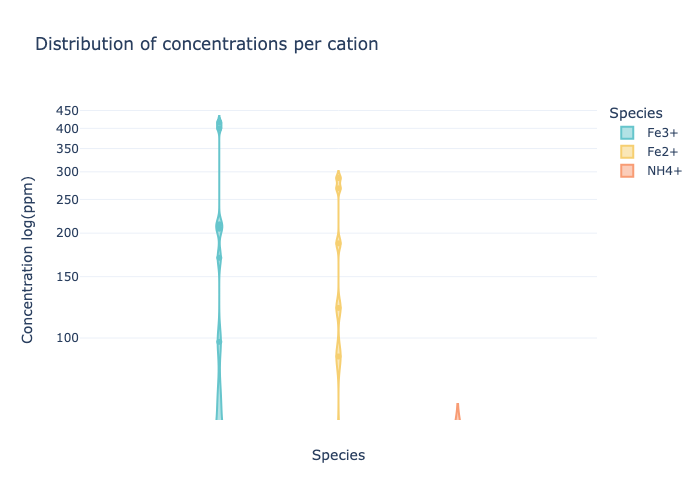

In [10]:
plot_concentrations(
    data_df_long=cations_df_long,
    data_type="cation",
    config=config
)

### Gases data

Table S7 - Occluded gases and natural activities at different depths (10/8/22)

In [11]:
gases_df_long = data_loader.get_gases()
gases_df_long

,Depth,Species,Concentration (ppm)
0,90,H2,40.0
1,102.6,H2,0.0
2,121.8,H2,2000.0
3,130.8,H2,0.0
4,139.4,H2,250.0
...,...,...,...
106,520,CH4,10.0
107,538.5,CH4,5.0
108,568.6,CH4,5.0
109,607.6,CH4,5.0


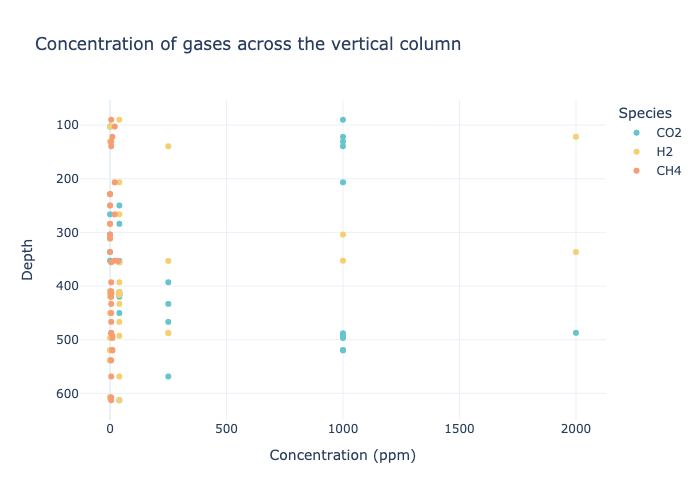

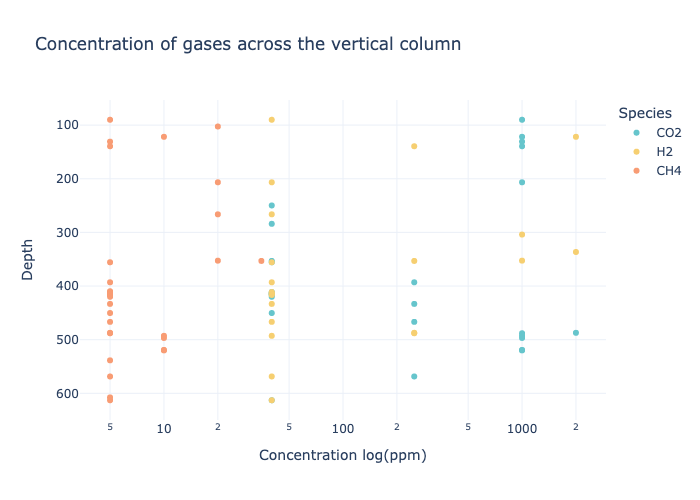

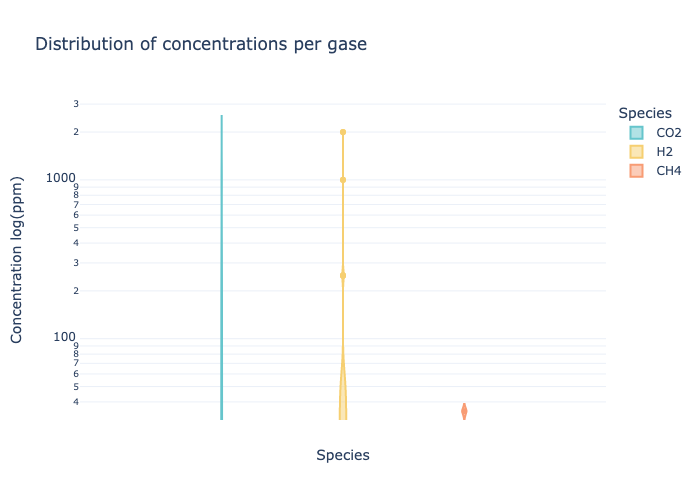

In [12]:
plot_concentrations(
    data_df_long=gases_df_long,
    data_type="gase",
    config=config
)

### Medium for MICOM

In [13]:
medium_df = data_loader.get_data()
medium_df

,Depth,Species,Concentration (ppm)
0,121,Li,131.23
1,130,Li,1244.97
2,138,Li,0.66
3,139,Li,89.95
4,190,Li,0.14
...,...,...,...
2576,520,CH4,10.00
2577,538,CH4,5.00
2578,568,CH4,5.00
2579,607,CH4,5.00


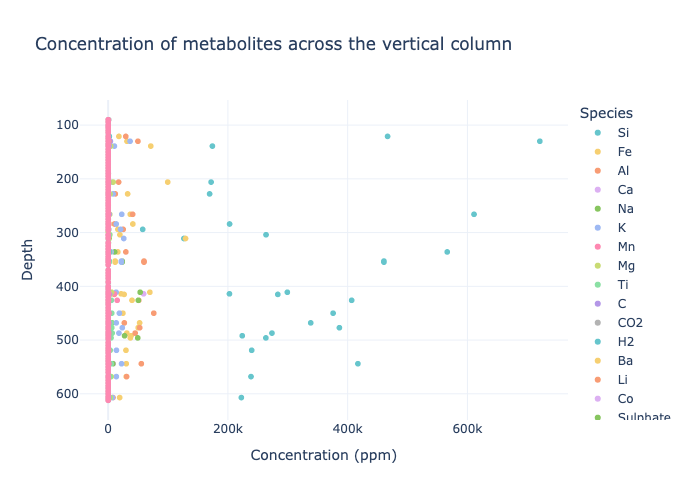

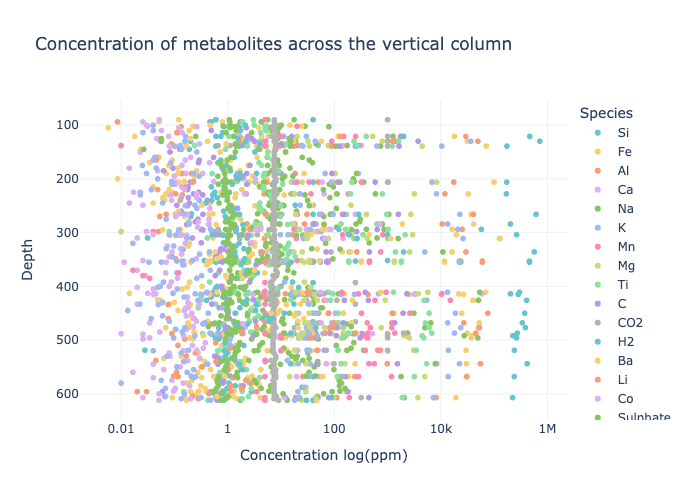

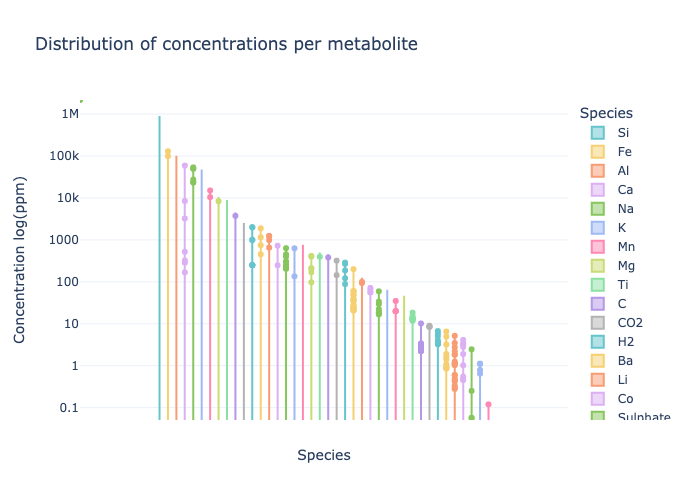

In [14]:
plot_concentrations(
    data_df_long=medium_df,
    data_type="metabolite",
    config=config
)

In [15]:
# Save for later analysis with MICOM
medium_df.to_csv(
    os.path.join(
        config["paths"]["micom"],
        "amils2023/",
        "medium.csv"
    ),
    index=False,
    header=True,
    sep=";"
)

### Microbial data

Table S8-2 - Number of microbial species detected at different depths which
have the potential of carry out key metabolic pathways of the C, H, N, S and
Fe cycles. 

In [16]:
microbes_df = data_loader.get_microbial_data()
microbes_df

,Pathway,90,122,228,280,284,392,416,433,468,477,487,497,538,544,569,607
0,DNRA,2,1,3,1,2,3,3,2,1,1,3,2,3,3,3,2
1,NR,3,3,3,1,4,5,6,3,3,3,5,4,3,5,5,4
2,comp denitr,1,2,2,0,2,2,3,2,2,2,3,3,2,3,3,3
3,N2 fix,1,1,3,2,1,3,3,2,2,2,3,3,2,2,3,3
4,DSR,1,0,1,1,0,1,1,1,1,1,1,1,2,0,1,1
5,SO32- → S2-,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1
6,S4O62- → S2O32-,1,2,1,1,2,2,2,1,1,1,2,2,1,2,2,2
7,S2O32-→ S2-,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1
8,S2 → pS,1,0,1,0,1,1,1,1,0,0,2,1,1,2,2,1
9,S2O32- → S4O62-,3,3,3,2,3,4,5,3,2,4,5,5,4,4,5,5


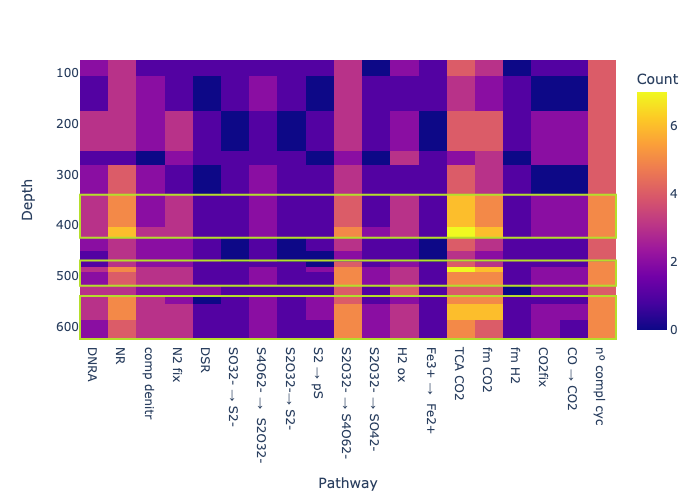

In [17]:
fig = plot_microbial_data(
    microbes_df=microbes_df,
    config=config
)

# Highlight depths with complete functions
fig.add_shape(
    type="rect",
    x0=0.0,
    x1=1.0,
    y0=340,
    y1=425,
    xref="paper",
    yref="y",
    line_color="#b5de2b"
)
fig.add_shape(
    type="rect",
    x0=0.0,
    x1=1.0,
    y0=470,
    y1=520,
    xref="paper",
    yref="y",
    line_color="#b5de2b"
)
fig.add_shape(
    type="rect",
    x0=0.0,
    x1=1.0,
    y0=540,
    y1=625,
    xref="paper",
    yref="y",
    line_color="#b5de2b"
)
fig.show("png")

save_fig(
    fig=fig,
    filename="amils2023-functions-depth.jpg",
    config=config
)

Depths with all microbial functions analyzed: [392, 416, 477, 487, 497, 544, 569, 607]


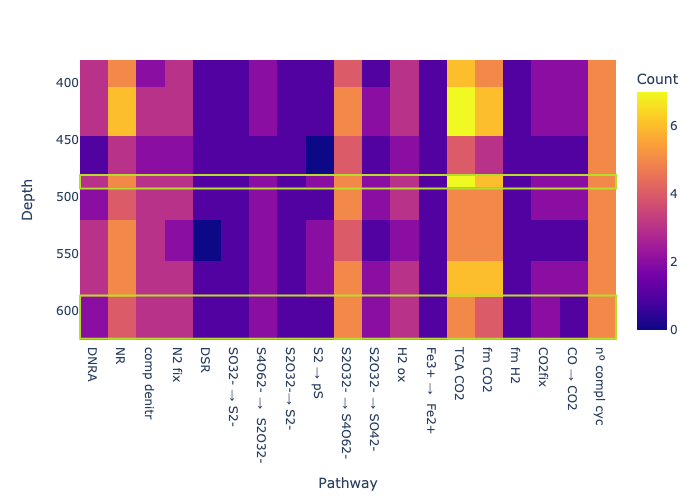

In [19]:
complete_depths = microbes_df[microbes_df["Pathway"] == "nº compl cyc"]
complete_depths = complete_depths[complete_depths == 5]\
    .dropna(axis=1)\
    .columns\
    .tolist()

print(
    "Depths with all microbial functions analyzed:",
    complete_depths
)

microbes_df_complete = microbes_df[["Pathway"] + complete_depths]

fig = plot_microbial_data(
    microbes_df=microbes_df_complete,
    config=config
)

fig.add_shape(
    type="rect",
    x0=0.0,
    x1=1.0,
    y0=481,
    y1=493,
    xref="paper",
    yref="y",
    line_color="#b5de2b"
)
fig.add_shape(
    type="rect",
    x0=0.0,
    x1=1.0,
    y0=587,
    y1=625,
    xref="paper",
    yref="y",
    line_color="#b5de2b"
)
fig.show("png")